In [81]:
import os
import sys
import pandas as pd
#sys.path.append('./')
#sys.path.append('/Users/yushiqiu/Documents/surv-rcts')
#dataset = os.system('python3 /Users/yushiqiu/Documents/surv-rcts/dev/dev_dataset.py')
import dev.dev_dataset as dev
dataset=dev.dataset


In [166]:
a = dataset._interventions
b = a['Main Study']
index_control = b.loc[b ==dataset.control_arm].index
index_treatment = b.loc[b==dataset.treatment_arm].index
control_covariate = dataset.covariates.loc[index_control]
treatment_covariate = dataset.covariates.loc[index_treatment]


In [172]:
# control_covariate

,Baseline_History_Myocardial_Infarction,Baseline_History_Stroke,Baseline_History_Angina,Baseline_History_Coronary_Artery_Bypass_Graft,Baseline_History_Percutaneous_Coronary_Intervention,Baseline_History_Cardiovascular_Disease,Baseline_Prior_revascularization,Baseline_Lipid_Lowering_Therapy,Baseline_Smoke_status,Baseline_On_Blood_Pressure_Medication,...,Baseline_Fasting_Plasma_Glucose,Baseline_Alanine_Transaminase,Baseline_Creatine_Phosphokinase,Baseline_Serum_creatinine,Baseline_Estimated_Glomerular_Filtration_Rate,Baseline_Urine_albumin,Baseline_Urine_albumin/creatinine_ratio,Baseline_Urine_creatinine,Baseline_LDL_Cholesterol,Baseline_HDL_Cholesterol
MaskID,,,,,,,,,,,,,,,,,,,,,
103964.0,No,No,No,No,No,No,No,Yes,No,Yes,...,154.0,54.0,272.0,1.0,81.4,3.74,6.4,0.587,117.0,37.0
108268.0,No,No,No,No,No,No,No,Yes,No,Yes,...,154.0,11.0,85.0,0.8,94.8,1.15,1.1,1.093,93.0,36.0
106800.0,No,No,No,No,No,No,No,No,No,No,...,170.0,18.0,126.0,1.1,70.8,2.39,1.7,1.439,149.0,37.0
109846.0,No,No,Yes,No,Yes,Yes,No,Yes,No,Yes,...,213.0,40.0,67.0,1.0,79.6,3.44,3.4,1.022,109.0,46.0
101707.0,No,No,No,No,No,No,No,Yes,No,Yes,...,146.0,25.0,254.0,1.1,54.7,1.16,1.5,0.800,63.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106109.0,No,No,No,No,No,No,No,Yes,No,Yes,...,193.0,13.0,67.0,0.5,160.7,79.80,34.0,2.345,129.0,65.0
108232.0,No,No,No,No,No,No,No,Yes,No,Yes,...,148.0,15.0,96.0,0.9,125.6,1.60,0.8,1.992,123.0,92.0
109630.0,Yes,No,No,No,Yes,Yes,No,Yes,No,Yes,...,192.0,44.0,913.0,1.0,96.3,0.78,0.6,1.354,78.0,39.0


In [173]:
# treatment_covariate

,Baseline_History_Myocardial_Infarction,Baseline_History_Stroke,Baseline_History_Angina,Baseline_History_Coronary_Artery_Bypass_Graft,Baseline_History_Percutaneous_Coronary_Intervention,Baseline_History_Cardiovascular_Disease,Baseline_Prior_revascularization,Baseline_Lipid_Lowering_Therapy,Baseline_Smoke_status,Baseline_On_Blood_Pressure_Medication,...,Baseline_Fasting_Plasma_Glucose,Baseline_Alanine_Transaminase,Baseline_Creatine_Phosphokinase,Baseline_Serum_creatinine,Baseline_Estimated_Glomerular_Filtration_Rate,Baseline_Urine_albumin,Baseline_Urine_albumin/creatinine_ratio,Baseline_Urine_creatinine,Baseline_LDL_Cholesterol,Baseline_HDL_Cholesterol
MaskID,,,,,,,,,,,,,,,,,,,,,
106889.0,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,...,179.0,12.0,33.0,1.00,56.4,2.78,3.3,0.831,162.0,30.0
103660.0,No,No,No,No,No,No,No,Yes,No,Yes,...,123.0,17.0,161.0,1.00,80.8,0.21,NaN,0.808,48.0,26.0
108622.0,No,No,No,Yes,No,Yes,No,Yes,No,Yes,...,137.0,18.0,185.0,0.90,82.6,1.07,0.4,2.735,198.0,60.0
109739.0,Yes,No,No,No,No,Yes,No,Yes,No,Yes,...,150.0,17.0,59.0,0.60,127.2,0.45,0.7,0.642,59.0,53.0
107775.0,No,No,No,No,No,No,No,Yes,No,Yes,...,173.0,51.0,504.0,1.10,100.6,8.73,5.1,1.714,156.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102692.0,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,...,223.0,21.0,77.0,0.64,145.0,1.63,2.4,0.688,139.0,46.0
103602.0,Yes,No,No,No,No,Yes,No,No,No,Yes,...,161.0,30.0,75.0,0.90,86.6,1.17,1.2,0.981,86.0,49.0
107012.0,Yes,No,No,No,Yes,Yes,No,Yes,No,Yes,...,162.0,20.0,52.0,0.70,88.3,5.91,4.1,1.425,77.0,27.0


In [174]:
from auton_survival.preprocessing import Preprocessor
features_control = Preprocessor().fit_transform(control_covariate, cat_feats=dataset.cat_features, num_feats=dataset.num_features)
features_treatment = Preprocessor().fit_transform(treatment_covariate, cat_feats=dataset.cat_features, num_feats=dataset.num_features)

In [176]:
features_control

,Baseline_Age,Baseline_Seated_Systolic_Blood_Pressure,Baseline_Seated_Diastolic_Blood_Pressure,Baseline_Heart_Rate,Baseline_Total_Cholesterol,Baseline_Triglycerides,Baseline_Very_low_density_lipoprotein,Baseline_Potassium,Baseline_Fasting_Plasma_Glucose,Baseline_Alanine_Transaminase,...,Baseline_History_Albuminuria_Not Available,Baseline_History_Albuminuria_Yes,Baseline_History_Left_Ventricular_Hypertrophy_Not Available,Baseline_History_Left_Ventricular_Hypertrophy_Yes,Baseline_Low_Ankle_Brachial_Index_Not Available,Baseline_Low_Ankle_Brachial_Index_Yes,Sex_Male,Race_b'Hispanic',Race_b'Other',Race_b'White'
MaskID,,,,,,,,,,,,,,,,,,,,,
103964.0,-0.627740,0.353639,0.905748,0.300867,-0.067979,-0.493727,-0.490183,-0.108024,-0.392877,1.974097,...,0,0,0,0,0,0,1,0,0,1
108268.0,-0.733598,-1.530022,-1.649752,0.040034,-0.718779,-0.502410,-0.540068,0.085891,-0.392877,-1.231036,...,0,0,0,1,1,0,0,0,0,0
106800.0,0.748410,0.110586,1.298902,-0.568577,0.783067,-0.398214,-0.390412,1.322094,-0.092235,-0.709271,...,0,0,1,0,1,0,1,1,0,0
109846.0,0.400591,0.049823,-0.568579,-0.568577,-0.017917,-0.450312,-0.440297,2.218947,0.715741,0.930565,...,0,1,1,0,1,0,1,0,0,1
101707.0,-1.096539,-0.679337,0.610883,0.300867,-1.394609,-0.771583,-0.839381,1.152419,-0.543198,-0.187505,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106109.0,-0.642863,1.508141,-0.077136,0.909477,0.733006,-0.823681,-0.889266,-2.119883,0.339938,-1.081960,...,0,1,1,0,1,0,0,0,0,0
108232.0,-0.582373,-0.010941,-0.568579,1.778921,1.433867,-1.162318,-1.288349,-0.398895,-0.505618,-0.932885,...,0,0,0,0,0,0,0,0,0,0
109630.0,0.400591,-0.800863,-1.256598,0.040034,-1.269456,-0.953926,-1.038922,1.200897,0.321148,1.228717,...,0,0,1,0,1,0,1,0,0,0


In [178]:
outcomes_control = dataset.outcomes.loc[index_control]

In [179]:
outcomes_control

,time,event
MaskID,,
103964.0,1591.089041,False
108268.0,8.601516,True
106800.0,1674.145890,True
109846.0,1662.137671,False
101707.0,1216.707108,False
...,...,...
106109.0,1839.258904,False
108232.0,2191.500000,False
109630.0,1581.082192,False


In [180]:
outcomes_treatment = dataset.outcomes.loc[index_treatment]

In [181]:
outcomes_treatment

,time,event
MaskID,,
106889.0,2191.500000,True
103660.0,1839.258904,False
108622.0,1644.125342,False
109739.0,153.383674,False
107775.0,2191.500000,False
...,...,...
102692.0,1090.746575,False
103602.0,1432.094970,False
107012.0,983.673288,False


In [317]:
import numpy as np
horizons = [0.25, 0.5, 0.75]
times_control = np.quantile(outcomes_control.time[outcomes_control.event==1], horizons).tolist()
times_treatment = np.quantile(outcomes_treatment.time[outcomes_treatment.event==1], horizons).tolist()



In [248]:
x_control, t_control, e_control = features_control.values, outcomes_control.time.values, outcomes_control.event.values

n = len(x_control)

tr_size = int(n*0.70)
vl_size = int(n*0.10)
te_size = int(n*0.20)

x_train_control, x_test_control, x_val_control = x_control[:tr_size], x_control[-te_size:], x_control[tr_size:tr_size+vl_size]
t_train_control, t_test_control, t_val_control = t_control[:tr_size], t_control[-te_size:], t_control[tr_size:tr_size+vl_size]
e_train_control, e_test_control, e_val_control = e_control[:tr_size], e_control[-te_size:], e_control[tr_size:tr_size+vl_size]

In [249]:
x_treatment, t_treatment, e_treatment = features_treatment.values, outcomes_treatment.time.values, outcomes_treatment.event.values

n = len(x_treatment)

tr_size = int(n*0.70)
vl_size = int(n*0.10)
te_size = int(n*0.20)

x_train_treatment, x_test_treatment, x_val_treatment = x_treatment[:tr_size], x_treatment[-te_size:], x_treatment[tr_size:tr_size+vl_size]
t_train_treatment, t_test_treatment, t_val_treatment = t_treatment[:tr_size], t_treatment[-te_size:], t_treatment[tr_size:tr_size+vl_size]
e_train_treatment, e_test_treatment, e_val_treatment = e_treatment[:tr_size], e_treatment[-te_size:], e_treatment[tr_size:tr_size+vl_size]

### Setting the parameter grid


In [186]:
from sklearn.model_selection import ParameterGrid

In [187]:
param_grid = {'k' : [3, 4, 6,8],
              'distribution' : ['LogNormal', 'Weibull'],
              'learning_rate' : [ 1e-4, 1e-3,1e-2],
              'layers' : [ [], [100], [100, 100], [100,100,100]]
             }
params = ParameterGrid(param_grid)

# DSM

In [188]:
from auton_survival.models.dsm import DeepSurvivalMachines

In [195]:
models_control = []
for param in params:
    model = DeepSurvivalMachines(k = param['k'],
                                 distribution = param['distribution'],
                                 layers = param['layers'])
    # The fit method is called to train the model
    model.fit(x_train_control, t_train_control, e_train_control, iters = 100, learning_rate = param['learning_rate'])
    models_control.append([[model.compute_nll(x_val_control, t_val_control, e_val_control), model]])
best_model_control = min(models_control)

model_control = best_model_control[0][1]

  8%|▊         | 8/100 [00:02<00:26,  3.47it/s]


In [198]:
models_treatment = []
for param in params:
    model = DeepSurvivalMachines(k = param['k'],
                                 distribution = param['distribution'],
                                 layers = param['layers'])
    # The fit method is called to train the model
    model.fit(x_train_treatment, t_train_treatment, e_train_treatment, iters = 100, learning_rate = param['learning_rate'])
    models_treatment.append([[model.compute_nll(x_val_treatment, t_val_treatment, e_val_treatment), model]])
best_model_treatment = min(models_treatment)

model_treatment = best_model_treatment[0][1]

  3%|▎         | 3/100 [00:00<00:27,  3.58it/s]


# Inference 

In [318]:
out_risk_control = model_control.predict_risk(x_test_control, times_control)
out_survival_control = model_control.predict_survival(x_test_control, times_control)

out_risk_treatment = model_treatment.predict_risk(x_test_treatment, times_treatment)
out_survival_treatment = model_treatment.predict_survival(x_test_treatment,times_treatment)

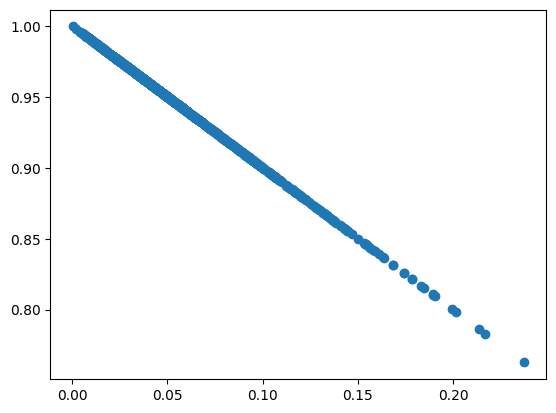

In [319]:
import matplotlib.pyplot as plt
x_1 =out_risk_control[:,1]
y_1 = out_survival_control[:,1]
plt.scatter(x_1,y_1)
plt.show()


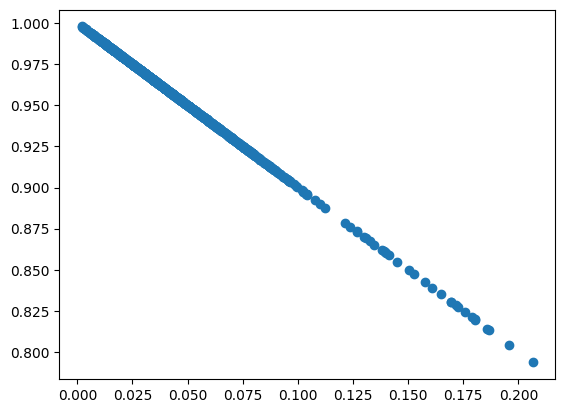

In [320]:
x_2 =out_risk_treatment[:,1]
y_2 = out_survival_treatment[:,1]
plt.scatter(x_2,y_2)
plt.show()

# Evaluation

In [211]:
from sksurv.metrics import concordance_index_ipcw, brier_score, cumulative_dynamic_auc

In [401]:
n = len(x_control)

tr_size = int(n*0.70)
vl_size = int(n*0.10)
te_size = int(n*0.20)

train_control = outcomes_control.head(tr_size)
test_control = outcomes_control.tail(te_size)

#when evaluating, pass the outcomes into evaluate()
#pass both out_survival and out_risk
print("Control Groups")
evaluate(out_survival_control,out_risk_control,train_control, test_control,times_control) 


Control Groups
METRIC                             381.2308836739277    779.9409443072086    1223.0529811363126
-------------------------------  -------------------  -------------------  --------------------
TEST FOLD PERFORMANCE
BR on Uncensored Data:                     0.0235882            0.0422315             0.082207
AUC on Uncensored Data:                    0.789763             0.745465              0.702222
C-index on Uncensored Data:                0.78585              0.739851              0.687929
Censoring Adjusted Brier Score:            0.0234023            0.041673              0.0626798
Censoring Adjusted AUC:                    0.789702             0.745148              0.698366
Censoring Adjusted C-index:                0.786208             0.740559              0.706127


In [402]:
train_treatment = outcomes_treatment.head(tr_size)
test_treatment = outcomes_treatment.tail(te_size)

#when evaluating, pass the outcomes into evaluate()
#pass both out_survival and out_risk
print("Treatment Groups")
evaluate(out_survival_treatment,out_risk_treatment,train_treatment, test_treatment,times_treatment) 

Treatment Groups
METRIC                             373.8610852234449    742.2648832247922    1157.7077082865485
-------------------------------  -------------------  -------------------  --------------------
TEST FOLD PERFORMANCE
BR on Uncensored Data:                     0.0158584            0.0359647             0.07215
AUC on Uncensored Data:                    0.569075             0.664312              0.650126
C-index on Uncensored Data:                0.585988             0.662951              0.640592
Censoring Adjusted Brier Score:            0.0157295            0.0354847             0.0586685
Censoring Adjusted AUC:                    0.568775             0.664661              0.64814
Censoring Adjusted C-index:                0.586846             0.662261              0.646872


In [398]:
def evaluate(predictions,out_risk, outcomes_train, outcomes_test,horizons):

    from auton_survival.metrics import survival_regression_metric
    from sklearn.metrics import roc_auc_score, brier_score_loss
    from sksurv import metrics
    from sksurv.util import Surv
    from tabulate import tabulate
  
    test_uncensored_aucs = []
    test_uncensored_brs = []
    test_uncensored_cis = []
    #test_censored_eces = []
    test_censored_brs = []
    test_censored_auc = []
    test_censored_cis = []

    from lifelines import KaplanMeierFitter

    censoring_outcomes = outcomes_train.copy()
   
    censoring_outcomes.event = 1-censoring_outcomes.event
  
    censoring_distribution = KaplanMeierFitter().fit(censoring_outcomes.time,
                                                     censoring_outcomes.event)
   

    for i, horizon in enumerate(horizons):

        y_pos = outcomes_test.time>=horizon
        y_neg = (outcomes_test.time<horizon)&(outcomes_test.event)
    
        outcomes_uncensored  = outcomes_test.loc[y_pos|y_neg]

        y = np.zeros(len(outcomes_uncensored))

        y[outcomes_uncensored.time>=horizon] = 1
        y[outcomes_uncensored.time<horizon] = 0

    
        test_uncensored_aucs.append(roc_auc_score(y, predictions[:, i][y_pos|y_neg]))
        test_uncensored_brs.append(brier_score_loss(y, predictions[:, i][y_pos|y_neg]))
        #test_censored_eces.append(expected_calibration_error(predictions[:, 1], outcomes_test, horizon))
    
        et_test_control_uncensored = np.array([(outcomes_uncensored.iloc[i, 1], outcomes_uncensored.iloc[i, 0]) for i in range(len(outcomes_uncensored))],
                 dtype = [('e', bool), ('t', float)])
    
        et_train_control = np.array([(outcomes_train.iloc[i,1], outcomes_train.iloc[i,0]) for i in range(len(outcomes_train))],
                 dtype = [('e', bool), ('t', float)])
        
        et_test_control_censored = np.array([(outcomes_test.iloc[i, 1], outcomes_test.iloc[i, 0]) for i in range(len(outcomes_test))],
                 dtype = [('e', bool), ('t', float)])


        outcomes_uncensored  = outcomes_test.loc[y_pos|y_neg]
        out_risk_uncensored = out_risk[y_pos|y_neg]

        test_uncensored_cis.append(concordance_index_ipcw(et_train_control, et_test_control_uncensored, out_risk_uncensored[:,i] , times_control[i])[0])
        
        weights = np.ones(outcomes_uncensored.shape[0])
        weights = censoring_distribution.predict(outcomes_uncensored.time.values)
        weights[outcomes_uncensored.time.values>=horizon] = censoring_distribution.predict(horizon)

        weights = 1./np.clip(weights, 1e-3, 1-1e-3)

        test_censored_auc.append(roc_auc_score(y, predictions[:, i][y_pos|y_neg], sample_weight=weights))                
        test_censored_brs.append(brier_score_loss(y, predictions[:, i][y_pos|y_neg], sample_weight=weights))
        test_censored_cis.append(concordance_index_ipcw(et_train_control, et_test_control_censored,out_risk[:,i], times_control[i])[0])
    # from auton_survival.metrics import survival_regression_metric

    # test_censored_brs = survival_regression_metric('brs', outcomes['test'], predictions['TEST'], horizons, outcomes['train'])
    # test_censored_auc = survival_regression_metric('auc', outcomes['test'], predictions['TEST'], horizons, outcomes['train'])

    to_print = []
    to_print.append(['TEST FOLD PERFORMANCE'])
    to_print.append(["BR on Uncensored Data:"] + test_uncensored_brs)
    to_print.append(["AUC on Uncensored Data:"] + test_uncensored_aucs)
    to_print.append(["C-index on Uncensored Data:"] + test_uncensored_cis)

    to_print.append(["Censoring Adjusted Brier Score:"] + list(test_censored_brs))
    to_print.append(["Censoring Adjusted AUC:"] + list(test_censored_auc))
    #to_print.append(["Censoring Adjusted ECE:"] + list(test_censored_eces))
    to_print.append(["Censoring Adjusted C-index:"] + list(test_censored_cis))

    # to_print.append(['TRAIN FOLD PERFORMANCE'])
    # train_censored_brs = metrics.brier_score(survival_train, survival_train, logistic(predictions['TRAIN']), horizons)[-1]
    # train_censored_auc = metrics.cumulative_dynamic_auc(survival_train, survival_train, 1-logistic(predictions['TRAIN']), horizons)[0]
    # to_print.append(["Censoring Adjusted Brier Score:"] + list(train_censored_brs))
    # to_print.append(["Censoring Adjusted AUC:"] + list(train_censored_auc))

    print(tabulate(to_print, headers=["METRIC"]+horizons))

# RSF